In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Getting the dat from "d" drive

In [3]:
df_pizza = pd.read_csv("D:\\CAP4910(2)\Project1\Pizza.csv", encoding='utf-8')
print(df_pizza)


     A  14069  27.82  21.43  44.87  5.11  1.77   0.77  4.93
0    A  14053  28.49  21.26  43.89  5.34  1.79   1.02  4.84
1    A  14025  28.35  19.99  45.78  5.08  1.63   0.80  4.95
2    A  14016  30.55  20.15  43.13  4.79  1.61   1.38  4.74
3    A  14005  30.49  21.28  41.65  4.82  1.64   1.76  4.67
4    A  14075  31.14  20.23  42.31  4.92  1.65   1.40  4.67
..  ..    ...    ...    ...    ...   ...   ...    ...   ...
294  J  34044  44.91  11.07  17.00  2.49  0.66  25.36  2.91
295  J  24069  43.15  11.79  18.46  2.43  0.67  24.17  3.10
296  J  34039  44.55  11.01  16.03  2.43  0.64  25.98  2.92
297  J  14044  47.60  10.43  15.18  2.32  0.56  24.47  2.76
298  J  14045  46.84   9.91  15.50  2.27  0.57  25.48  2.81

[299 rows x 9 columns]


In [4]:
df_pizza.columns = ['brand','id','mois','prot','fat','ash','sodium','carb','cal']

df_pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
1,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
2,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
3,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
4,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67


In [5]:
df_pizza.dtypes

brand      object
id          int64
mois      float64
prot      float64
fat       float64
ash       float64
sodium    float64
carb      float64
cal       float64
dtype: object

In [6]:
df_pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
1,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
2,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
3,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
4,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67


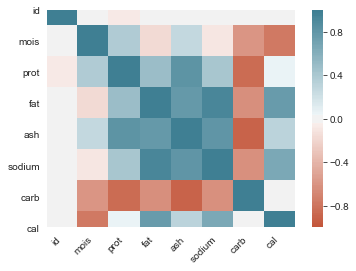

In [7]:
data = df_pizza

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encoding with sklearn's LabelEncoder
le = LabelEncoder()
df_pizza.brand = le.fit_transform(df_pizza.brand)
df_pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
1,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
2,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
3,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
4,0,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
...,...,...,...,...,...,...,...,...,...
294,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
295,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
296,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
297,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [9]:
from sklearn.model_selection import train_test_split

X, y = df_pizza.iloc[:, 0:].values, df_pizza.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Extracting the principal components step by step

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84947374e+00 2.30775980e+00 1.01744016e+00 4.91842843e-01
 2.65428727e-01 8.47598880e-02 2.60737380e-02 4.76908607e-04
 1.34242583e-05]


Total and explained variance

In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [13]:
var_exp

[0.5362522797097236,
 0.2551908765850495,
 0.11250800264510732,
 0.05438772531357634,
 0.029350970371602843,
 0.00937270425755637,
 0.0028832203645918503,
 5.273630530124182e-05,
 1.4844474909719238e-06]

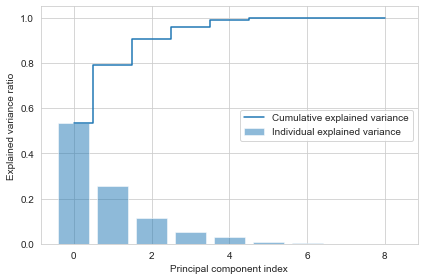

In [14]:
import matplotlib.pyplot as plt


plt.bar(range(0, 9), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0, 9), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

Feature transformation

In [15]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [16]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.38293242 -0.07806353]
 [-0.04716641 -0.00622398]
 [ 0.04721853 -0.63013065]
 [ 0.34821115 -0.28604947]
 [ 0.41871081  0.2053599 ]
 [ 0.43152444 -0.13308537]
 [ 0.40017571  0.17233247]
 [-0.38526202  0.34167517]
 [ 0.23991248  0.55556602]]


In [17]:
 X_train_std[0].dot(w)

array([-1.25042286,  1.11810544])

In [18]:
X_train_pca = X_train_std.dot(w)

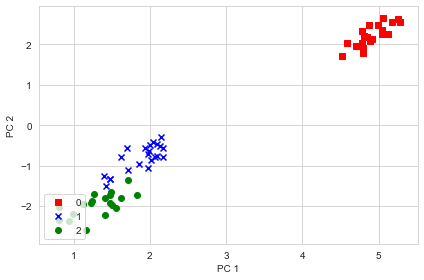

In [19]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers): plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([5.36252280e-01, 2.55190877e-01, 1.12508003e-01, 5.43877253e-02,
       2.93509704e-02, 9.37270426e-03, 2.88322036e-03, 5.27363053e-05,
       1.48444749e-06])

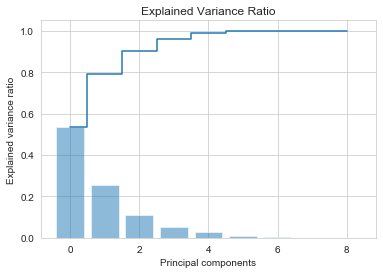

In [21]:
plt.bar(range(0, 9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 9), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio')
plt.show()

Principal component analysis in scikit-learn

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    #marker=markers[idx], 
                    label=cl)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1,solver='lbfgs')

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [24]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

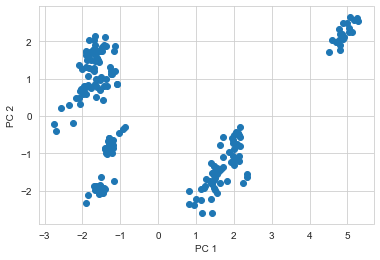

In [25]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

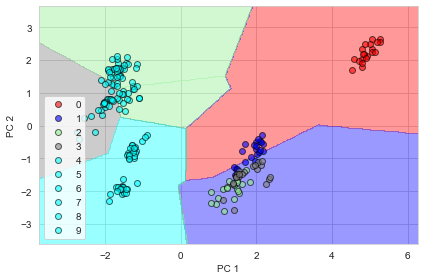

In [26]:
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

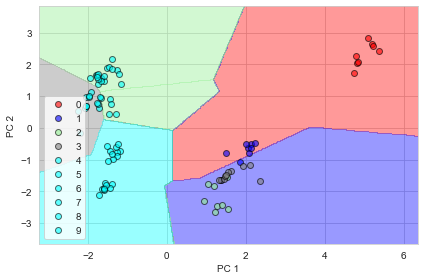

In [27]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [28]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([5.36252280e-01, 2.55190877e-01, 1.12508003e-01, 5.43877253e-02,
       2.93509704e-02, 9.37270426e-03, 2.88322036e-03, 5.27363053e-05,
       1.48444749e-06])

In [29]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.53625228, 0.25519088])

Supervised data compression via linear discriminant analysis

In [30]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [-1.2317 -0.2501  1.0995  0.0359  0.8324  0.6489  0.8446 -1.0477 -0.1328]

MV 2: [-0.8843 -0.0489  0.8566  1.9698 -0.08    0.5036 -0.5527 -1.1479 -0.6345]

MV 3: [-0.5369 -0.1866  0.7212  1.405   0.1592  1.347   0.1408 -1.0529 -0.4463]



In [31]:
d =  9 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 9x9


In [32]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [22 19 22 20 21 20 23 20 22]


Projecting examples onto the new feature space

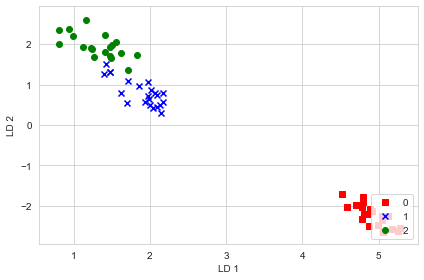

In [33]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()